In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from glob import glob
import csv

In [2]:
dataset= glob('Data/*.csv')
dataset

['Data\\education_participation_rates_20-24.csv',
 'Data\\immigration_stats.csv',
 'Data\\income_of_couple_families.csv',
 'Data\\income_of_lone-parent_families.csv',
 'Data\\study_performance.csv',
 'Data\\unemployment_rates_15-19.csv',
 'Data\\unemployment_rates_20-24.csv',
 'Data\\Youth_Crime_Index.csv',
 'Data\\youth_crime_severity_index_rate.csv']

In [3]:
df = pd.read_csv('Data\\study_performance.csv')

In [4]:
import seaborn as sns

### HeatMap

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_22544\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

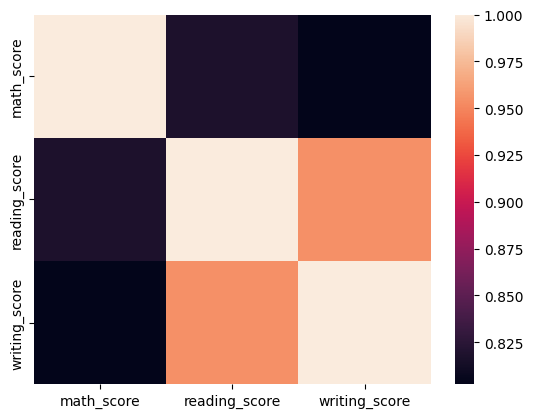

In [5]:
sns.heatmap(df.corr())

In [6]:
df.corr()

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_22544\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [7]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
df['test_preparation_course_int']=df['test_preparation_course'].apply(lambda x: 0 if x=='none' else 1 )


In [9]:
def convert_string_to_int(x,cols):
    parentalLevelUniqueValues = list(cols.unique())#["bachelor's degree", 'some college', "master's degree",
       #"associate's degree", 'high school', 'some high school']
    parentalLevelUniqueValuesDict = dict(zip(parentalLevelUniqueValues,list(range(len(parentalLevelUniqueValues)))))
    return parentalLevelUniqueValuesDict[x]

In [10]:
df['parental_level_of_education_int']=df['parental_level_of_education'].apply(lambda x: convert_string_to_int(x,df['parental_level_of_education']) )

df['race_ethnicity_int']=df['race_ethnicity'].apply(lambda x: convert_string_to_int(x,df['race_ethnicity']) )

df['lunch_int']=df['lunch'].apply(lambda x: convert_string_to_int(x,df['lunch']) )


In [11]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,test_preparation_course_int,parental_level_of_education_int,race_ethnicity_int,lunch_int
0,female,group B,bachelor's degree,standard,none,72,72,74,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,1,1,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,2,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,3,2,1
4,male,group C,some college,standard,none,76,78,75,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,2,4,0
996,male,group C,high school,free/reduced,none,62,55,55,0,4,1,1
997,female,group C,high school,free/reduced,completed,59,71,65,1,4,1,1
998,female,group D,some college,standard,completed,68,78,77,1,1,3,0


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_22544\2303800637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

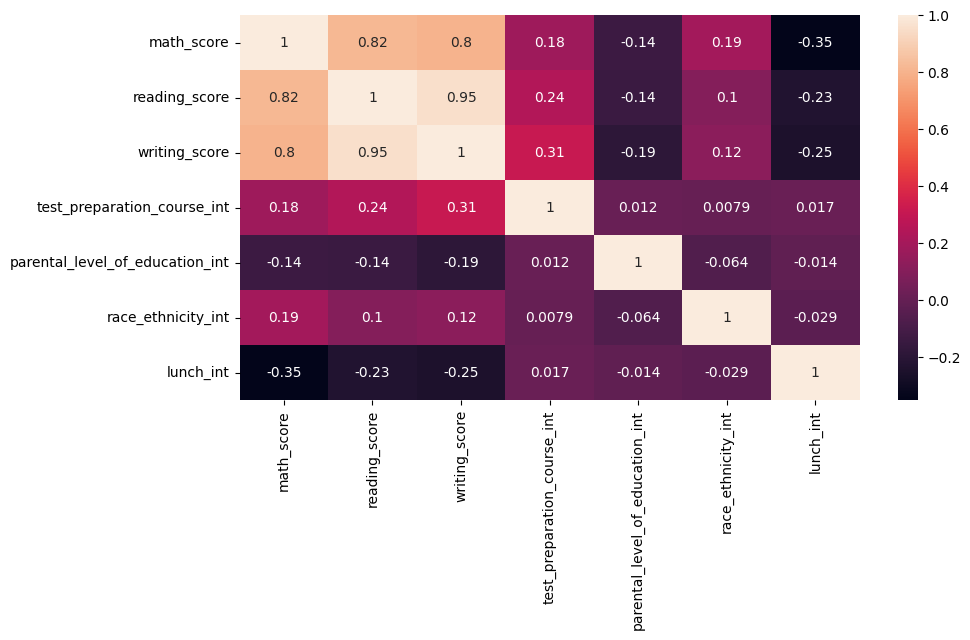

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)